In [14]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [40]:
population_width = 100
t_iterations = 40
lmbd = 1
c = 1
a = .9


dh = .5
dp = .01

In [41]:
parasites = []
hosts = []
parasites.append(
    np.random.rand(population_width, population_width)*10
)
hosts.append(
    np.random.rand(population_width, population_width)*10
)

In [42]:
def H_next(t):

    p_star = H_star(t)
    exp = np.exp(-a * P_star(t))
    next_H = lmbd * p_star * np.exp(-a * P_star(t))
    hosts.append(next_H)

def P_next(t, k=None):

    h_star = H_star(t)
    
    next_P = c * h_star * (1 - np.exp(-a * P_star(t)))
    if k:

        next_P += k * parasites[t-1]
        
    parasites.append(next_P)

def H_star(t):

    kernel_sum_mat = np.zeros_like(hosts[0])
    return (1 - dh) * hosts[t-1] + (dh) * kernel_sum(hosts[t-1], kernel_sum_mat) / 8.

def P_star(t):

    kernel_sum_mat = np.zeros_like(parasites[0])
    return (1 - dp) * parasites[t-1] + (dp/8.) * kernel_sum(parasites[t-1], kernel_sum_mat)
    

In [43]:
def kernel_sum(mat, res):

    mat_width = mat.shape[0] # both dims are equal

    for i in range(0, mat.shape[0]):
        for j in range(0, mat.shape[1]):

            for w in range(-1, 2):
                for h in range(-1 ,2):

                    coord_i = (i + w + mat_width) % mat_width
                    coord_j = (j + h + mat_width) % mat_width
                    res[i][j] += mat[coord_i][coord_j]

    return res



In [44]:
    saved_hosts_dists = []
    saved_parasites_dists = []
    hosts_num = []
    parasites_num = []

In [45]:
def run_simulation(k=None):


    for it in range(1, t_iterations+1):

        print("Iteration ", it)
        if(it % 4 == 1):

            saved_hosts_dists.append(hosts[it-1])
            saved_parasites_dists.append(parasites[it-1])
            
        hosts_num.append(np.log(np.sum(hosts[it-1])))
        parasites_num.append(np.log(np.sum(parasites[it-1])))
        H_next(it)
        P_next(it, k)

    



In [33]:
def show_dists(saved_dists):
    dist_fig, axs = plt.subplots(len(saved_dists), figsize=(20,20))
    for idx, saved in enumerate(saved_dists):
        axs[idx].imshow(saved)

In [34]:

def plot_pops():
    x = np.arange(len(hosts_num))
    plt.plot(x, hosts_num, label="hosts")
    plt.plot(x, parasites_num, label="parasites")
    plt.legend()

In [23]:
run_simulation()

Iteration  1
Iteration  2
Iteration  3
Iteration  4
Iteration  5
Iteration  6
Iteration  7
Iteration  8
Iteration  9
Iteration  10
Iteration  11
Iteration  12
Iteration  13
Iteration  14
Iteration  15
Iteration  16
Iteration  17
Iteration  18
Iteration  19
Iteration  20
Iteration  21
Iteration  22
Iteration  23
Iteration  24
Iteration  25
Iteration  26
Iteration  27
Iteration  28
Iteration  29
Iteration  30
Iteration  31
Iteration  32
Iteration  33
Iteration  34
Iteration  35
Iteration  36
Iteration  37
Iteration  38
Iteration  39
Iteration  40


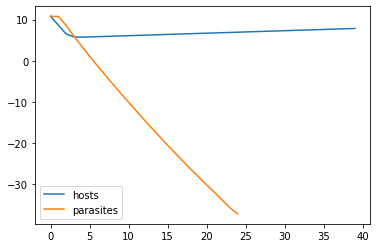

In [24]:
plot_pops()

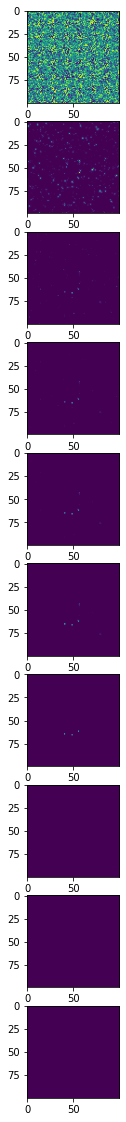

In [25]:
show_dists(saved_parasites_dists)

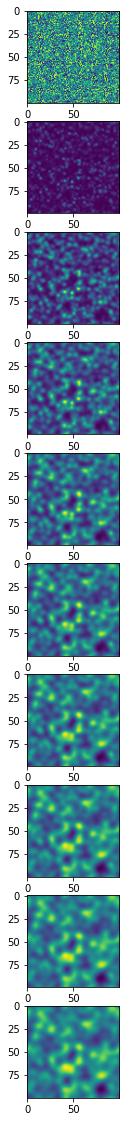

In [26]:
show_dists(saved_hosts_dists)

In [46]:
k = .3
run_simulation(k)

Iteration  1
Iteration  2
Iteration  3
Iteration  4
Iteration  5
Iteration  6
Iteration  7
Iteration  8
Iteration  9
Iteration  10
Iteration  11
Iteration  12
Iteration  13
Iteration  14
Iteration  15
Iteration  16
Iteration  17
Iteration  18
Iteration  19
Iteration  20
Iteration  21
Iteration  22
Iteration  23
Iteration  24
Iteration  25
Iteration  26
Iteration  27
Iteration  28
Iteration  29
Iteration  30
Iteration  31
Iteration  32
Iteration  33
Iteration  34
Iteration  35
Iteration  36
Iteration  37
Iteration  38
Iteration  39
Iteration  40


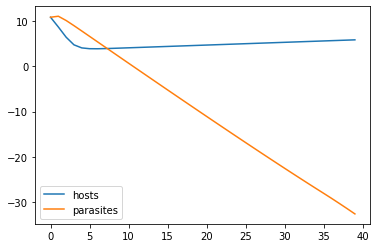

In [47]:
plot_pops()

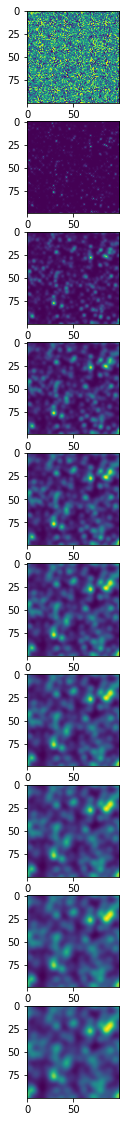

In [48]:
show_dists(saved_hosts_dists)

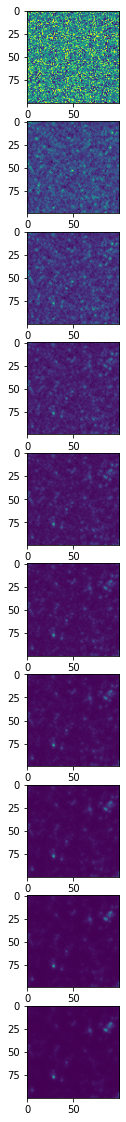

In [49]:
show_dists(saved_parasites_dists)